# Explore the processed and annotated data from the GEO database

In [22]:
# Imports
import os
import numpy as np
from scipy.io import mmread
import pandas as pd
import scanpy as sc

# `GSE202498_raw_5kb.h5ad`

In [2]:
# Load the raw data
adata_raw = sc.read_h5ad('/cellar/users/aklie/data/datasets/Zhu2023_sc-islet_snATAC-seq/annotation/04Jul23/GSE202498_raw_5kb.h5ad')
adata_raw

AnnData object with n_obs × n_vars = 65255 × 563550
    obs: 'batch', 'duplicated_reads', 'frac_duplicated_reads', 'frac_mito_reads', 'frac_promoters_used', 'frac_reads_in_peaks', 'frac_reads_in_promoters', 'log10_n_counts', 'log10_n_peaks', 'n_counts', 'n_peaks', 'reads_in_peaks', 'reads_in_promoters', 'total_sequenced_reads', 'tss_used', 'unique_mito_reads', 'unique_usable_reads', 'donor'

# `GSE202498_final_cluster.h5ad`

In [6]:
# Load in the "final" data
adata_final = sc.read_h5ad('/cellar/users/aklie/data/datasets/Zhu2023_sc-islet_snATAC-seq/annotation/04Jul23/GSE202498_final_cluster.h5ad')
adata_final

AnnData object with n_obs × n_vars = 65255 × 54493
    obs: 'batch', 'donor', 'duplicated_reads', 'frac_duplicated_reads', 'frac_mito_reads', 'frac_promoters_used', 'frac_reads_in_peaks', 'frac_reads_in_promoters', 'log10_n_counts', 'log10_n_peaks', 'log10_usable_counts', 'log_usable_counts', 'n_counts', 'n_peaks', 'norm_log_counts', 'reads_in_peaks', 'reads_in_promoters', 'total_sequenced_reads', 'tss_used', 'unique_mito_reads', 'unique_usable_reads', 'leiden'
    uns: 'leiden', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

/cellar/users/aklie/opt/miniconda3/envs/scverse-py39-R431/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


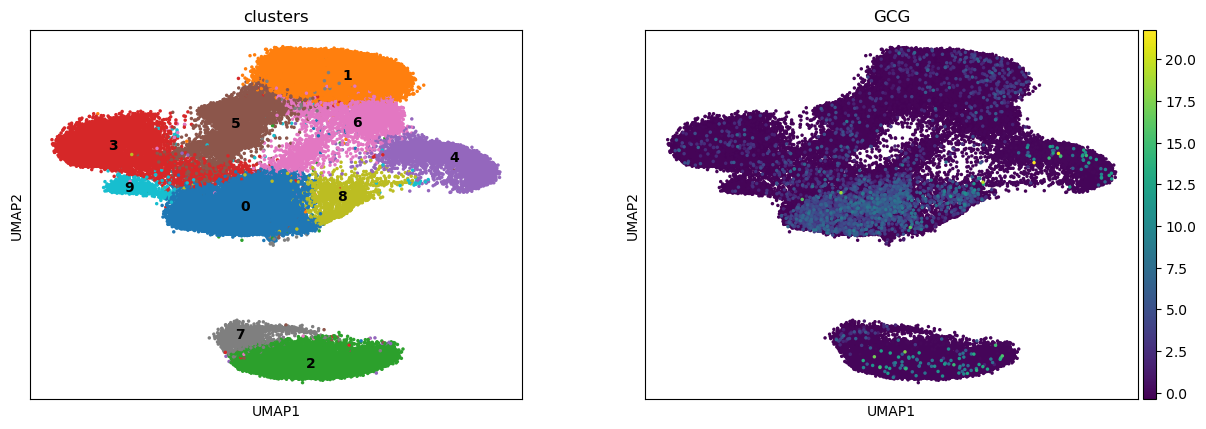

In [13]:
sc.pl.umap(adata_final, color=['leiden', "GCG"], size=25, title='clusters', legend_loc='on data')

# Other data

In [16]:
# Load in the barcodes and regions
barcodes = pd.read_csv("/cellar/users/aklie/data/datasets/Zhu2023_sc-islet_snATAC-seq/annotation/04Jul23/GSE202498_all.barcodes.txt", header=None)[0].values
regions = pd.read_csv("/cellar/users/aklie/data/datasets/Zhu2023_sc-islet_snATAC-seq/annotation/04Jul23/GSE202498_all.regions.txt", header=None)[0].values
len(barcodes), len(regions)

In [19]:
# Load mtx
mtx = mmread("/cellar/users/aklie/data/datasets/Zhu2023_sc-islet_snATAC-seq/annotation/04Jul23/GSE202498_all.mtx")
mtx.shape

In [24]:
# Check if adata_final.X and mtx have all the same values
np.allclose(adata_final.X, mtx.toarray())

: 

: 

# DONE!

---